In [1]:
!pip install pandas

In [2]:
import pandas
from IPython.display import display, Markdown

class Writer:
    def __init__(self):
        self.out = ''

    def add(self, str):
        self.out = f'{self.out}\n{str}'
        
    def add_header(self, str):
        self.add(f'**{str}**:')
        
    def add_unordered_item(self, str):
        self.add(f'  - {str}')
        
    def add_ordered_item(self, str):
        self.add(f'  1. {str}')
    
    def add_single(self, name, value):
        self.add(f'**{name}**: {value}')
        self.add('')
    
    def write(self):
        display(Markdown(self.out))

data = pandas.read_csv("ratings.csv")
count = len(data)

w = Writer()
w.add_single('Movies', count)
w.add_header('Headers')
for row in data.columns:
    w.add_ordered_item(row)
w.write()


**Movies**: 1000

**Headers**:
  1. Const
  1. Your Rating
  1. Date Rated
  1. Title
  1. URL
  1. Title Type
  1. IMDb Rating
  1. Runtime (mins)
  1. Year
  1. Genres
  1. Num Votes
  1. Release Date
  1. Directors

In [3]:
import dateutil.parser

start_date = dateutil.parser.parse(data['Date Rated'].min())
end_date = dateutil.parser.parse(data['Date Rated'].max())
interval = end_date - start_date
years = round(interval.days / 365, 2)
period = f'{start_date.year} - {end_date.year} ({years} years)'
ratings_per_year = round(count / years, 2)

w = Writer()
w.add_single('Period', period)
w.add_single('Ratings / year', ratings_per_year)
w.write()


**Period**: 2009 - 2023 (13.86 years)

**Ratings / year**: 72.15


In [31]:
title_index = data.columns.get_loc('Title')
release_date_index = data.columns.get_loc('Release Date')
date_rated_index = data.columns.get_loc('Date Rated')
your_rating_index = data.columns.get_loc('Your Rating')
imdb_rating_index = data.columns.get_loc('IMDb Rating')
runtime_index = data.columns.get_loc('Runtime (mins)')
genres_index = data.columns.get_loc('Genres')
directors_index = data.columns.get_loc('Directors')

top_casual_movies = data.sort_values(['Your Rating', 'IMDb Rating'], ascending=False).head(5).values

w = Writer()
w.add('**Top casual movies** (higher iMDB rating & my rating):')
for row in top_casual_movies:
    year = dateutil.parser.parse(row[release_date_index]).year
    imdb = row[imdb_rating_index]
    my_rating = row[your_rating_index]
    w.add_ordered_item(f'**{row[title_index]}** ({year}, iMDB = {imdb}, me = {my_rating})')
w.add('')

top_trash_movies = data.sort_values(['Your Rating', 'IMDb Rating'], ascending=[False, True]).head(5).values

w.add('**Top trash movies** (lower iMDB rating but higher my rating):')
for row in top_trash_movies:
    year = dateutil.parser.parse(row[release_date_index]).year
    imdb = row[imdb_rating_index]
    my_rating = row[your_rating_index]
    w.add_ordered_item(f'**{row[title_index]}** ({year}, iMDB = {imdb}, me = {my_rating})')
w.add('')

w.write()


**Top casual movies** (higher iMDB rating & my rating):
  1. **The Godfather** (1972, iMDB = 9.2, me = 10)
  1. **The Lord of the Rings: The Return of the King** (2003, iMDB = 9.0, me = 10)
  1. **The Dark Knight** (2008, iMDB = 9.0, me = 10)
  1. **Pulp Fiction** (1994, iMDB = 8.9, me = 10)
  1. **Inception** (2010, iMDB = 8.8, me = 10)

**Top trash movies** (lower iMDB rating but higher my rating):
  1. **The Midnight Meat Train** (2008, iMDB = 6.0, me = 10)
  1. **Six-String Samurai** (1998, iMDB = 6.4, me = 10)
  1. **C.S.A.: The Confederate States of America** (2004, iMDB = 6.4, me = 10)
  1. **Silent Hill** (2006, iMDB = 6.5, me = 10)
  1. **Terminator Salvation** (2009, iMDB = 6.5, me = 10)


In [5]:
data['rating_diff'] = data.apply (lambda row: row[your_rating_index] - row[imdb_rating_index], axis=1)
my_overrated_movies = data.sort_values('rating_diff', ascending=False).head(5).values

w = Writer()
w.add('**My overrated movies** (my rating > iMDB rating):')
for row in my_overrated_movies:
    year = dateutil.parser.parse(row[release_date_index]).year
    imdb = row[imdb_rating_index]
    my_rating = row[your_rating_index]
    w.add_ordered_item(f'**{row[title_index]}** ({year}, iMDB = {imdb}, me = {my_rating})')
w.add('')

my_underrated_movies = data.sort_values('rating_diff', ascending=True).head(5).values

w.add('**My underrated movies** (my rating < iMDB rating):')
for row in my_underrated_movies:
    year = dateutil.parser.parse(row[release_date_index]).year
    imdb = row[imdb_rating_index]
    my_rating = row[your_rating_index]
    w.add_ordered_item(f'**{row[title_index]}** ({year}, iMDB = {imdb}, me = {my_rating})')
w.add('')

w.write()


**My overrated movies** (my rating > iMDB rating):
  1. **The Midnight Meat Train** (2008, iMDB = 6.0, me = 10)
  1. **C.S.A.: The Confederate States of America** (2004, iMDB = 6.4, me = 10)
  1. **Six-String Samurai** (1998, iMDB = 6.4, me = 10)
  1. **Silent Hill** (2006, iMDB = 6.5, me = 10)
  1. **Terminator Salvation** (2009, iMDB = 6.5, me = 10)

**My underrated movies** (my rating < iMDB rating):
  1. **Patch Adams** (1998, iMDB = 6.8, me = 1)
  1. **Zhit** (2012, iMDB = 7.2, me = 2)
  1. **The Hunger Games** (2012, iMDB = 7.2, me = 2)
  1. **Dredd** (2012, iMDB = 7.1, me = 2)
  1. **Stalag 17** (1953, iMDB = 8.0, me = 3)


In [6]:
data_in_1991 = data.copy()
data_in_1991 = data_in_1991[data_in_1991['Year'] == 1991]
best_in_1991 = data_in_1991.sort_values(['Your Rating', 'IMDb Rating'], ascending=False).head(10).values

w = Writer()
w.add_header('Best in 1991')
for row in best_in_1991:
    imdb = row[imdb_rating_index]
    my_rating = row[your_rating_index]
    w.add_ordered_item(f'**{row[title_index]}** (iMDB = {imdb}, me = {my_rating})')
w.add('')

data_in_2022 = data.copy()
data_in_2022 = data_in_2022[data_in_2022['Year'] == 2022]
best_in_2022 = data_in_2022.sort_values(['Your Rating', 'IMDb Rating'], ascending=False).head(10).values

w.add_header('Best in 2022')
for row in best_in_2022:
    imdb = row[imdb_rating_index]
    my_rating = row[your_rating_index]
    w.add_ordered_item(f'**{row[title_index]}** (iMDB = {imdb}, me = {my_rating})')
w.add('')

w.write()


**Best in 1991**:
  1. **The Silence of the Lambs** (iMDB = 8.6, me = 10)
  1. **The Doors** (iMDB = 7.2, me = 8)
  1. **Naked Lunch** (iMDB = 6.9, me = 7)
  1. **The Resurrected** (iMDB = 6.2, me = 6)
  1. **Highlander II: The Quickening** (iMDB = 4.2, me = 1)

**Best in 2022**:
  1. **Im Westen nichts Neues** (iMDB = 7.8, me = 9)
  1. **Top Gun: Maverick** (iMDB = 8.3, me = 8)
  1. **The Batman** (iMDB = 7.8, me = 8)
  1. **The Unbearable Weight of Massive Talent** (iMDB = 7.0, me = 8)
  1. **Doctor Strange in the Multiverse of Madness** (iMDB = 6.9, me = 8)
  1. **Fantastic Beasts: The Secrets of Dumbledore** (iMDB = 6.2, me = 8)
  1. **Crimes of the Future** (iMDB = 5.9, me = 8)
  1. **Harry Potter 20th Anniversary: Return to Hogwarts** (iMDB = 8.0, me = 7)
  1. **Everything Everywhere All at Once** (iMDB = 7.9, me = 7)
  1. **Chip 'n Dale: Rescue Rangers** (iMDB = 7.0, me = 6)


In [7]:
my_longest_movies = data.sort_values('Runtime (mins)', ascending=False).head(5).values

w = Writer()
w.add_header('My longest movies')
for row in my_longest_movies:
    year = dateutil.parser.parse(row[release_date_index]).year
    hours = round(row[runtime_index] / 60, 2)
    imdb = row[imdb_rating_index]
    my_rating = row[your_rating_index]
    w.add_ordered_item(f'**{row[title_index]}** ({year}, {hours} hours, iMDB = {imdb}, me = {my_rating})')

w.write()


**My longest movies**:
  1. **Pantera: 3 Vulgar Videos from Hell** (1999, 4.08 hours, iMDB = 9.1, me = 7)
  1. **Zack Snyder's Justice League** (2021, 4.03 hours, iMDB = 8.0, me = 9)
  1. **Rush: Snakes & Arrows - Live in Holland** (2008, 3.68 hours, iMDB = 8.6, me = 9)
  1. **Lawrence of Arabia** (1962, 3.63 hours, iMDB = 8.3, me = 8)
  1. **The Godfather Part II** (1974, 3.37 hours, iMDB = 9.0, me = 8)

In [8]:
my_longest_movies = data.sort_values('Release Date', ascending=True).head(5).values

w = Writer()
w.add_header('My older movies')
for row in my_longest_movies:
    year = dateutil.parser.parse(row[release_date_index]).year
    imdb = row[imdb_rating_index]
    my_rating = row[your_rating_index]
    w.add_ordered_item(f'**{row[title_index]}** ({year}, iMDB = {imdb}, me = {my_rating})')

w.write()


**My older movies**:
  1. **Metropolis** (1927, iMDB = 8.3, me = 9)
  1. **All Quiet on the Western Front** (1930, iMDB = 8.1, me = 8)
  1. **Dracula** (1931, iMDB = 7.4, me = 7)
  1. **M - Eine Stadt sucht einen Mörder** (1931, iMDB = 8.3, me = 9)
  1. **Frankenstein** (1931, iMDB = 7.8, me = 6)

In [9]:
!pip install matplotlib

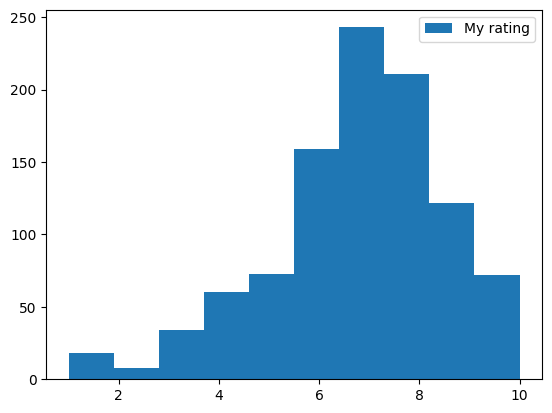

In [10]:
import matplotlib.pyplot

values = data['Your Rating']
matplotlib.pyplot.hist(values, label='My rating')
matplotlib.pyplot.legend()

None

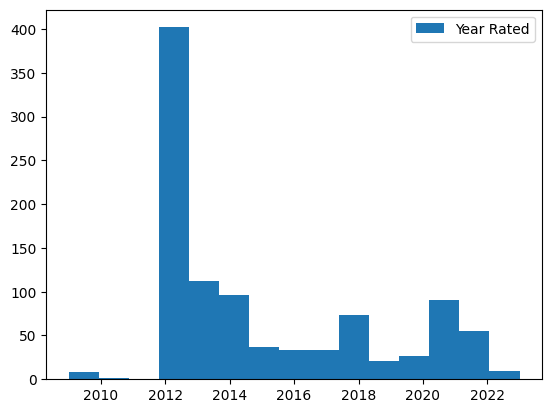

In [11]:
data['your_rated_year'] = data.apply (lambda row: dateutil.parser.parse(row[date_rated_index]).year, axis=1)
values = data['your_rated_year']
matplotlib.pyplot.hist(values, label='Year Rated', bins=15)
matplotlib.pyplot.legend()

None

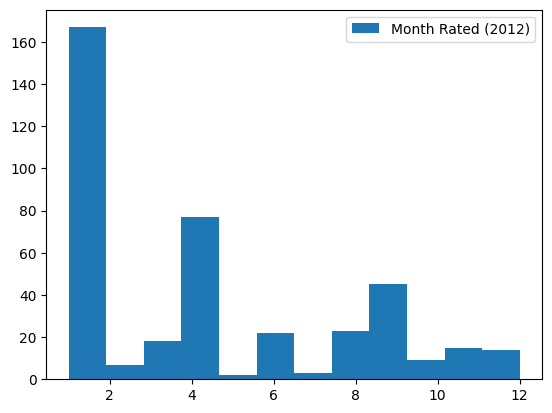

In [12]:
data_2012 = data.copy()
data_2012 = data_2012[data_2012['your_rated_year'] == 2012]
data_2012['your_rated_month'] = data_2012.apply (lambda row: dateutil.parser.parse(row[date_rated_index]).month, axis=1)
values = data_2012['your_rated_month']
matplotlib.pyplot.hist(values, label='Month Rated (2012)', bins=12)
matplotlib.pyplot.legend()

None

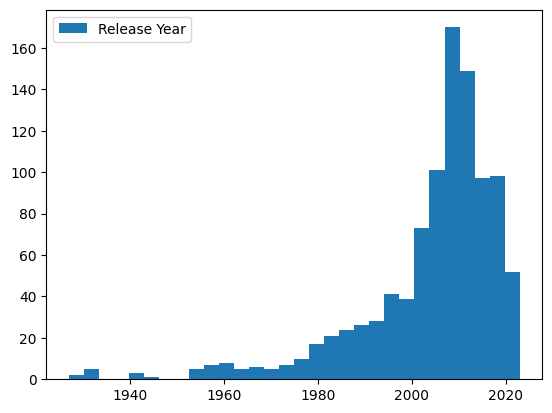

In [13]:
values = data['Year']
matplotlib.pyplot.hist(values, label='Release Year', bins=30)
matplotlib.pyplot.legend()

None

In [43]:
genres = set()

for genres_str in data['Genres']:
    genres_list = genres_str.split(',')
    for genre in genres_list:
        genres.add(genre.strip())

genre_movies = dict()
    
for genre in genres:
    cur_genre_movies = data.copy()
    cur_genre_movies['contains_genre'] = cur_genre_movies.apply (lambda row: genre in row[genres_index], axis=1)
    cur_genre_movies = cur_genre_movies[cur_genre_movies['contains_genre'] == True]
    avg_genre_rating = round(cur_genre_movies['Your Rating'].mean(), 2)
    count = len(cur_genre_movies)
    top_movie_entry = cur_genre_movies.sort_values(['Your Rating', 'IMDb Rating'], ascending=False).head(1).values[0]
    top_title = top_movie_entry[title_index]
    top_year = dateutil.parser.parse(top_movie_entry[release_date_index]).year
    top_imdb = top_movie_entry[imdb_rating_index]
    top_my_rating = top_movie_entry[your_rating_index]
    top_movie_str = f'**{top_title}** ({top_year}, iMDB = {top_imdb}, me = {top_my_rating})'
    summary = {
        'count': count,
        'rating': avg_genre_rating,
        'top_movie': top_movie_str
    }
    genre_movies[genre] = summary

top_genre_movies = dict(sorted(genre_movies.items(), key=lambda x: x[1]['count'], reverse=True))

w = Writer()
w.add_header('Genres (sorted by count) and top movie in each')
for genre in top_genre_movies:
    gm = genre_movies[genre]
    count = gm['count']
    rating = gm['rating']
    w.add_unordered_item(f'**{genre}** ({count}, avg. rating = {rating})')
    top_movie = gm['top_movie']
    w.add(f'    - {top_movie}')
w.write()


**Genres (sorted by count) and top movie in each**:
  - **Drama** (482, avg. rating = 7.18)
    - **The Godfather** (1972, iMDB = 9.2, me = 10)
  - **Action** (402, avg. rating = 6.79)
    - **The Lord of the Rings: The Return of the King** (2003, iMDB = 9.0, me = 10)
  - **Thriller** (346, avg. rating = 6.63)
    - **The Dark Knight** (2008, iMDB = 9.0, me = 10)
  - **Sci-Fi** (341, avg. rating = 6.78)
    - **Inception** (2010, iMDB = 8.8, me = 10)
  - **Adventure** (293, avg. rating = 6.86)
    - **The Lord of the Rings: The Return of the King** (2003, iMDB = 9.0, me = 10)
  - **Comedy** (221, avg. rating = 6.82)
    - **Sobache serdtse** (1988, iMDB = 8.6, me = 10)
  - **Fantasy** (188, avg. rating = 7.0)
    - **The Lord of the Rings: The Return of the King** (2003, iMDB = 9.0, me = 10)
  - **Crime** (177, avg. rating = 7.15)
    - **The Godfather** (1972, iMDB = 9.2, me = 10)
  - **Horror** (160, avg. rating = 6.46)
    - **El espinazo del diablo** (2001, iMDB = 7.4, me = 10)
  - **Mystery** (149, avg. rating = 6.79)
    - **The Green Mile** (1999, iMDB = 8.6, me = 10)
  - **Romance** (76, avg. rating = 6.82)
    - **Scott Pilgrim vs. the World** (2010, iMDB = 7.5, me = 10)
  - **Family** (65, avg. rating = 6.6)
    - **WALL·E** (2008, iMDB = 8.4, me = 10)
  - **Music** (55, avg. rating = 7.6)
    - **Foo Fighters: Back and Forth** (2011, iMDB = 8.2, me = 10)
  - **Biography** (54, avg. rating = 7.2)
    - **Into the Wild** (2007, iMDB = 8.1, me = 10)
  - **War** (48, avg. rating = 7.12)
    - **Paths of Glory** (1957, iMDB = 8.4, me = 10)
  - **Animation** (44, avg. rating = 7.18)
    - **WALL·E** (2008, iMDB = 8.4, me = 10)
  - **History** (26, avg. rating = 6.88)
    - **Nixon** (1995, iMDB = 7.1, me = 10)
  - **Documentary** (23, avg. rating = 7.78)
    - **Foo Fighters: Back and Forth** (2011, iMDB = 8.2, me = 10)
  - **Western** (18, avg. rating = 7.39)
    - **Django Unchained** (2012, iMDB = 8.4, me = 10)
  - **Musical** (16, avg. rating = 7.62)
    - **Sweeney Todd: The Demon Barber of Fleet Street** (2007, iMDB = 7.3, me = 10)
  - **Short** (8, avg. rating = 7.38)
    - **Music for One Apartment and Six Drummers** (2001, iMDB = 7.9, me = 10)
  - **Sport** (4, avg. rating = 5.0)
    - **The Wrestler** (2008, iMDB = 7.9, me = 7)
  - **Film-Noir** (4, avg. rating = 8.0)
    - **The Killing** (1956, iMDB = 7.9, me = 9)

In [44]:
directors = set()

for directors_str in data['Directors']:
    if not isinstance(directors_str, str):
        continue
    directors_list = directors_str.split(',')
    for director in directors_list:
        directors.add(director.strip())

director_movies = dict()
    
for director in directors:
    cur_director_movies = data.copy()
    cur_director_movies['contains_director'] = cur_director_movies.apply (lambda row: isinstance(row[directors_index], str) and director in row[directors_index], axis=1)
    cur_director_movies = cur_director_movies[cur_director_movies['contains_director'] == True]
    avg_director_rating = round(cur_director_movies['Your Rating'].mean(), 2)
    count = len(cur_director_movies)
    if count < 6:
        continue
    top_movie_entry = cur_director_movies.sort_values(['Your Rating', 'IMDb Rating'], ascending=False).head(1).values[0]
    top_title = top_movie_entry[title_index]
    try:
        top_year = dateutil.parser.parse(top_movie_entry[release_date_index]).year
    except:
        top_year = '?'
    top_imdb = top_movie_entry[imdb_rating_index]
    top_my_rating = top_movie_entry[your_rating_index]
    top_movie_str = f'**{top_title}** ({top_year}, iMDB = {top_imdb}, me = {top_my_rating})'
    summary = {
        'count': count,
        'rating': avg_director_rating,
        'top_movie': top_movie_str
    }
    director_movies[director] = summary

top_director_movies = dict(sorted(director_movies.items(), key=lambda x: x[1]['rating'], reverse=True))

w = Writer()
w.add_header('Directors (6+ movies) and their top movie (sorted by count)')
for director in top_director_movies:
    dm = director_movies[director]
    count = dm['count']
    rating = dm['rating']
    w.add_unordered_item(f'**{director}** ({count}, avg. rating = {rating})')
    top_movie = dm['top_movie']
    w.add(f'    - {top_movie}')
w.write()



**Directors (6+ movies) and their top movie (sorted by count)**:
  - **Quentin Tarantino** (10, avg. rating = 8.8)
    - **Pulp Fiction** (1994, iMDB = 8.9, me = 10)
  - **Peter Jackson** (8, avg. rating = 8.75)
    - **The Lord of the Rings: The Return of the King** (2003, iMDB = 9.0, me = 10)
  - **Christopher Nolan** (10, avg. rating = 8.5)
    - **The Dark Knight** (2008, iMDB = 9.0, me = 10)
  - **Stanley Kubrick** (12, avg. rating = 8.42)
    - **Paths of Glory** (1957, iMDB = 8.4, me = 10)
  - **Zack Snyder** (9, avg. rating = 8.22)
    - **Watchmen** (2009, iMDB = 7.6, me = 10)
  - **Guillermo del Toro** (9, avg. rating = 8.22)
    - **El laberinto del fauno** (2006, iMDB = 8.2, me = 10)
  - **Ridley Scott** (9, avg. rating = 8.11)
    - **Blade Runner** (1982, iMDB = 8.1, me = 10)
  - **Oliver Stone** (6, avg. rating = 7.83)
    - **Natural Born Killers** (1994, iMDB = 7.2, me = 10)
  - **David Fincher** (6, avg. rating = 7.83)
    - **Se7en** (1995, iMDB = 8.6, me = 9)
  - **Guy Ritchie** (11, avg. rating = 7.82)
    - **Sherlock Holmes** (2009, iMDB = 7.6, me = 10)
  - **Robert Rodriguez** (7, avg. rating = 7.71)
    - **Sin City** (2005, iMDB = 8.0, me = 10)
  - **Steven Spielberg** (7, avg. rating = 7.71)
    - **E.T. the Extra-Terrestrial** (1982, iMDB = 7.9, me = 9)
  - **Aleksey Balabanov** (7, avg. rating = 7.57)
    - **Morfiy** (2008, iMDB = 7.2, me = 9)
  - **Danny Boyle** (6, avg. rating = 7.5)
    - **National Theatre Live: Frankenstein** (2011, iMDB = 8.6, me = 10)
  - **David Yates** (7, avg. rating = 7.43)
    - **Harry Potter and the Deathly Hallows: Part 2** (2011, iMDB = 8.1, me = 8)
  - **Lana Wachowski** (6, avg. rating = 7.33)
    - **The Matrix** (1999, iMDB = 8.7, me = 9)
  - **Tim Burton** (9, avg. rating = 7.22)
    - **Sweeney Todd: The Demon Barber of Fleet Street** (2007, iMDB = 7.3, me = 10)
  - **Sam Raimi** (6, avg. rating = 6.67)
    - **Doctor Strange in the Multiverse of Madness** (2022, iMDB = 6.9, me = 8)
  - **John Carpenter** (8, avg. rating = 6.0)
    - **The Thing** (1982, iMDB = 8.2, me = 8)
  - **Bryan Singer** (6, avg. rating = 5.83)
    - **X-Men: Days of Future Past** (2014, iMDB = 7.9, me = 7)
  - **Michael Bay** (6, avg. rating = 4.83)
    - **Transformers** (2007, iMDB = 7.0, me = 8)
  - **Paul W.S. Anderson** (6, avg. rating = 4.5)
    - **Mortal Kombat** (1995, iMDB = 5.8, me = 7)